In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns

import sys
import os
from analysis_funcs import *

In [2]:
BLOCK_NUM = 1

In [3]:
title_fontsize = 18
labels_fontsize = 18
ticks_fontsize = 18

# Customizing fonts globally to use Arial (or another sans-serif font)
plt.rcParams.update({
    'font.family': 'sans-serif',  # Choose a sans-serif font
    'font.sans-serif': ['Arial'],  # Set to Arial (if available)
    'font.size': labels_fontsize,  # Adjust default font size
    'axes.titlesize': title_fontsize,  # Title font size
    'axes.labelsize': labels_fontsize,  # Label font size
    'legend.fontsize': 12,  # Legend font size
})


In [4]:
def RUSA_load_data(full_file_path, update_num=-2, verbose=False, static=False):
    filt_emg_idx=2
    dec_idx=3
    p_act_idx=8
    p_ref_idx=7
    
    if update_num==-2:
        init_idx = -1600
        final_idx = -800
    elif update_num==-1:
        init_idx = -800
        final_idx = -1
    elif update_num==0:
        init_idx = 0
        final_idx = 800
    else:
        raise ValueError(f"update_num {update_num} not supported, please use 0, -1, or -2!")
        
    if not static:
        try:
            with h5py.File(full_file_path, 'r') as handle:
                weiner_dataset = handle['weiner']
                weiner_df = pd.DataFrame(weiner_dataset)

            # Get the last 1600 points and then only keep points from -1600 to -800
            weiner_df = weiner_df.iloc[-1600:final_idx]

            # Create lists for the remaining data
            dec_lst = [weiner_df.iloc[i, 0][dec_idx] for i in range(weiner_df.shape[0])]
            emg_lst = [weiner_df.iloc[i, 0][filt_emg_idx] for i in range(weiner_df.shape[0])]
            pref_lst = [weiner_df.iloc[i, 0][p_ref_idx] for i in range(weiner_df.shape[0])]
            pact_lst = [weiner_df.iloc[i, 0][p_act_idx] for i in range(weiner_df.shape[0])]
            return dec_lst, emg_lst, pref_lst, pact_lst
        except OSError:
            print(f"Unable to open/find file: {full_file_path}\nThus, downstream will be dummy values of -1")
            return [], [], [], []
    
def return_final_averaged_cost_and_tdposerror(full_file_path, update_num=-2):
    dec_lst, emg_lst, pref_lst, pact_lst = RUSA_load_data(full_file_path, update_num=update_num, verbose=False, static=False)
    if len(dec_lst)==0:
        return -1, -1
    else:
        cost_log, perf_log, penalty_log = calc_cost_function(emg_lst, dec_lst, pref_lst, pact_lst)
        td_error = calc_time_domain_error(np.array(pref_lst), np.array(pact_lst))
        return np.mean(cost_log), np.mean(td_error)

## LOADING DATA

In [5]:
# Function to extract cost and time-domain performance
def extract_performance(file_dict):
    results = {}
    for key, file_path in file_dict.items():
        mean_cost, mean_tdpe = return_final_averaged_cost_and_tdposerror(file_path)
        results[key] = {
            'mean_cost': mean_cost,
            'mean_tdpe': mean_tdpe
        }
    return results

In [6]:
# Define block and condition names
blocks = ['Block1', 'Block2']
conditions = [
    'C0_local_random_init', 'C1_local_prev_local_init', 'C2_local_sims_init', 
    'C3_StaticTrial', 'C4_pfa_random_init', 'C5_pfa_sims_init', 
    'C6_pfa_running_random', 'C7_pfa_running_sim'
]

In [8]:
SUBJECT_STR = "S101"
print(SUBJECT_STR)
BASEPATH_BRC = r'D:\\Kai_CPHS_23_24\\lgrice_dir\\user_study\\' + SUBJECT_STR 
basepath = BASEPATH_BRC

file_paths = {
    f'{block}_{condition}': f"{basepath}\\weiner_IMWUT25_{SUBJECT_STR}_{block}_{condition}.h5"
    for block in blocks
    for condition in conditions
}
S101_performance_results = extract_performance(file_paths)

SUBJECT_STR = "S102"
print(SUBJECT_STR)
BASEPATH_BRC = r'D:\\Kai_CPHS_23_24\\lgrice_dir\\user_study\\' + SUBJECT_STR 
basepath = BASEPATH_BRC
file_paths = {
    f'{block}_{condition}': f"{basepath}\\weiner_IMWUT25_{SUBJECT_STR}_{block}_{condition}.h5"
    for block in blocks
    for condition in conditions}
S102_performance_results = extract_performance(file_paths)

SUBJECT_STR = "S103"
print(SUBJECT_STR)
BASEPATH_BRC = r'D:\\Kai_CPHS_23_24\\lgrice_dir\\user_study\\' + SUBJECT_STR 
basepath = BASEPATH_BRC
file_paths = {
    f'{block}_{condition}': f"{basepath}\\weiner_IMWUT25_{SUBJECT_STR}_{block}_{condition}.h5"
    for block in blocks
    for condition in conditions}
S103_performance_results = extract_performance(file_paths)

SUBJECT_STR = "S104"
print(SUBJECT_STR)
BASEPATH_BRC = r'D:\\Kai_CPHS_23_24\\lgrice_dir\\user_study\\' + SUBJECT_STR 
basepath = BASEPATH_BRC
file_paths = {
    f'{block}_{condition}': f"{basepath}\\weiner_IMWUT25_{SUBJECT_STR}_{block}_{condition}.h5"
    for block in blocks  # Forgot/missing C2 in B2...
    for condition in conditions}
S104_performance_results = extract_performance(file_paths)

SUBJECT_STR = "S105"
print(SUBJECT_STR)
BASEPATH_BRC = r'D:\\Kai_CPHS_23_24\\lgrice_dir\\user_study\\' + SUBJECT_STR 
basepath = BASEPATH_BRC
file_paths = {
    f'{block}_{condition}': f"{basepath}\\weiner_IMWUT25_{SUBJECT_STR}_{block}_{condition}.h5"
    for block in blocks
    for condition in conditions}
S105_performance_results = extract_performance(file_paths)

SUBJECT_STR = "S106"
print(SUBJECT_STR)
BASEPATH_BRC = r'D:\\Kai_CPHS_23_24\\lgrice_dir\\user_study\\' + SUBJECT_STR 
basepath = BASEPATH_BRC
file_paths = {
    f'{block}_{condition}': f"{basepath}\\weiner_IMWUT25_{SUBJECT_STR}_{block}_{condition}.h5"
    for block in blocks  # Forgot/missing C1 in B2...
    for condition in conditions}
S106_performance_results = extract_performance(file_paths)

#SUBJECT_STR = "S107"
#print(SUBJECT_STR)
#BASEPATH_BRC = r'D:\\Kai_CPHS_23_24\\lgrice_dir\\user_study\\' + SUBJECT_STR 
#basepath = BASEPATH_BRC
#file_paths = {
#    f'{block}_{condition}': f"{basepath}\\weiner_IMWUT25_{SUBJECT_STR}_{block}_{condition}.h5"
#    for block in blocks
#    for condition in conditions}
#S107_performance_results = extract_performance(file_paths)

SUBJECT_STR = "S108"
print(SUBJECT_STR)
BASEPATH_BRC = r'D:\\Kai_CPHS_23_24\\lgrice_dir\\user_study\\' + SUBJECT_STR 
basepath = BASEPATH_BRC
file_paths = {
    f'{block}_{condition}': f"{basepath}\\weiner_IMWUT25_{SUBJECT_STR}_{block}_{condition}.h5"
    for block in blocks
    for condition in conditions}
S108_performance_results = extract_performance(file_paths)

SUBJECT_STR = "S109"
print(SUBJECT_STR)
BASEPATH_BRC = r'D:\\Kai_CPHS_23_24\\lgrice_dir\\user_study\\' + SUBJECT_STR 
basepath = BASEPATH_BRC
file_paths = {
    f'{block}_{condition}': f"{basepath}\\weiner_IMWUT25_{SUBJECT_STR}_{block}_{condition}.h5"
    for block in blocks
    for condition in conditions}
S109_performance_results = extract_performance(file_paths)

SUBJECT_STR = "S110"
print(SUBJECT_STR)
BASEPATH_BRC = r'D:\\Kai_CPHS_23_24\\lgrice_dir\\user_study\\' + SUBJECT_STR 
basepath = BASEPATH_BRC
file_paths = {
    f'{block}_{condition}': f"{basepath}\\weiner_IMWUT25_{SUBJECT_STR}_{block}_{condition}.h5"
    for block in blocks
    for condition in conditions}
S110_performance_results = extract_performance(file_paths)

SUBJECT_STR = "S111"
print(SUBJECT_STR)
BASEPATH_BRC = r'D:\\Kai_CPHS_23_24\\lgrice_dir\\user_study\\' + SUBJECT_STR 
basepath = BASEPATH_BRC
file_paths = {
    f'{block}_{condition}': f"{basepath}\\weiner_IMWUT25_{SUBJECT_STR}_{block}_{condition}.h5"
    for block in blocks
    for condition in conditions}
S111_performance_results = extract_performance(file_paths)

SUBJECT_STR = "S112"
print(SUBJECT_STR)
BASEPATH_BRC = r'D:\\Kai_CPHS_23_24\\lgrice_dir\\user_study\\' + SUBJECT_STR 
basepath = BASEPATH_BRC
file_paths = {
    f'{block}_{condition}': f"{basepath}\\weiner_IMWUT25_{SUBJECT_STR}_{block}_{condition}.h5"
    for block in blocks
    for condition in conditions}
S112_performance_results = extract_performance(file_paths)

SUBJECT_STR = "S113"
print(SUBJECT_STR)
BASEPATH_BRC = r'D:\\Kai_CPHS_23_24\\lgrice_dir\\user_study\\' + SUBJECT_STR 
basepath = BASEPATH_BRC
file_paths = {
    f'{block}_{condition}': f"{basepath}\\weiner_IMWUT25_{SUBJECT_STR}_{block}_{condition}.h5"
    for block in blocks
    for condition in conditions}
S113_performance_results = extract_performance(file_paths)

SUBJECT_STR = "S114"
print(SUBJECT_STR)
BASEPATH_BRC = r'D:\\Kai_CPHS_23_24\\lgrice_dir\\user_study\\' + SUBJECT_STR 
basepath = BASEPATH_BRC
file_paths = {
    f'{block}_{condition}': f"{basepath}\\weiner_IMWUT25_{SUBJECT_STR}_{block}_{condition}.h5"
    for block in blocks
    for condition in conditions}
S114_performance_results = extract_performance(file_paths)

SUBJECT_STR = "S115"
print(SUBJECT_STR)
BASEPATH_BRC = r'D:\\Kai_CPHS_23_24\\lgrice_dir\\user_study\\' + SUBJECT_STR 
basepath = BASEPATH_BRC
file_paths = {
    f'{block}_{condition}': f"{basepath}\\weiner_IMWUT25_{SUBJECT_STR}_{block}_{condition}.h5"
    for block in blocks
    for condition in conditions}
S115_performance_results = extract_performance(file_paths)

SUBJECT_STR = "S116"
print(SUBJECT_STR)
BASEPATH_BRC = r'D:\\Kai_CPHS_23_24\\lgrice_dir\\user_study\\' + SUBJECT_STR 
basepath = BASEPATH_BRC
file_paths = {
    f'{block}_{condition}': f"{basepath}\\weiner_IMWUT25_{SUBJECT_STR}_{block}_{condition}.h5"
    for block in blocks
    for condition in conditions}
S116_performance_results = extract_performance(file_paths)

SUBJECT_STR = "S117"
print(SUBJECT_STR)
BASEPATH_BRC = r'D:\\Kai_CPHS_23_24\\lgrice_dir\\user_study\\' + SUBJECT_STR 
basepath = BASEPATH_BRC
file_paths = {
    f'{block}_{condition}': f"{basepath}\\weiner_IMWUT25_{SUBJECT_STR}_{block}_{condition}.h5"
    for block in blocks
    for condition in conditions}
S117_performance_results = extract_performance(file_paths)


S101
S102
S103
S104
Unable to open/find file: D:\\Kai_CPHS_23_24\\lgrice_dir\\user_study\\S104\weiner_IMWUT25_S104_Block2_C2_local_sims_init.h5
Thus, downstream will be dummy values of -1
S105
S106
Unable to open/find file: D:\\Kai_CPHS_23_24\\lgrice_dir\\user_study\\S106\weiner_IMWUT25_S106_Block2_C1_local_prev_local_init.h5
Thus, downstream will be dummy values of -1
S108
S109
S110
S111
S112
S113
S114
S115
S116
S117


In [9]:
# Witholding S100_performance_results since one of his model's blew up...
# Witholding S107_performance_results since we are missing 3 trials...

perf_dicts_lst = [S101_performance_results, S102_performance_results, 
                  S103_performance_results, S104_performance_results, S105_performance_results, 
                  S106_performance_results, S108_performance_results,
                  S109_performance_results, S110_performance_results, S111_performance_results, 
                  S112_performance_results, S113_performance_results, S114_performance_results, 
                  S115_performance_results, S116_performance_results, S117_performance_results]

lri_c0_cost = [perf_dict[f'Block{BLOCK_NUM}_C0_local_random_init']['mean_cost'] for perf_dict in perf_dicts_lst]
lpli_c1_cost = [perf_dict[f'Block{BLOCK_NUM}_C1_local_prev_local_init']['mean_cost'] for perf_dict in perf_dicts_lst]
lsi_c2_cost = [perf_dict[f'Block{BLOCK_NUM}_C2_local_sims_init']['mean_cost'] for perf_dict in perf_dicts_lst]
st_c3_cost = [perf_dict[f'Block{BLOCK_NUM}_C3_StaticTrial']['mean_cost'] for perf_dict in perf_dicts_lst]
pri_c4_cost = [perf_dict[f'Block{BLOCK_NUM}_C4_pfa_random_init']['mean_cost'] for perf_dict in perf_dicts_lst]
psi_c5_cost = [perf_dict[f'Block{BLOCK_NUM}_C5_pfa_sims_init']['mean_cost'] for perf_dict in perf_dicts_lst]
prr_c6_cost = [perf_dict[f'Block{BLOCK_NUM}_C6_pfa_running_random']['mean_cost'] for perf_dict in perf_dicts_lst]
prs_c7_cost = [perf_dict[f'Block{BLOCK_NUM}_C7_pfa_running_sim']['mean_cost'] for perf_dict in perf_dicts_lst]

lri_c0_tdpe = [perf_dict[f'Block{BLOCK_NUM}_C0_local_random_init']['mean_tdpe'] for perf_dict in perf_dicts_lst]
lpli_c1_tdpe = [perf_dict[f'Block{BLOCK_NUM}_C1_local_prev_local_init']['mean_tdpe'] for perf_dict in perf_dicts_lst]
lsi_c2_tdpe = [perf_dict[f'Block{BLOCK_NUM}_C2_local_sims_init']['mean_tdpe'] for perf_dict in perf_dicts_lst]
st_c3_tdpe = [perf_dict[f'Block{BLOCK_NUM}_C3_StaticTrial']['mean_tdpe'] for perf_dict in perf_dicts_lst]
pri_c4_tdpe = [perf_dict[f'Block{BLOCK_NUM}_C4_pfa_random_init']['mean_tdpe'] for perf_dict in perf_dicts_lst]
psi_c5_tdpe = [perf_dict[f'Block{BLOCK_NUM}_C5_pfa_sims_init']['mean_tdpe'] for perf_dict in perf_dicts_lst]
prr_c6_tdpe = [perf_dict[f'Block{BLOCK_NUM}_C6_pfa_running_random']['mean_tdpe'] for perf_dict in perf_dicts_lst]
prs_c7_tdpe = [perf_dict[f'Block{BLOCK_NUM}_C7_pfa_running_sim']['mean_tdpe'] for perf_dict in perf_dicts_lst]

# Figures

In [11]:
NUM_PLOTTED_CONDITIONS = 8
NUM_PLOTTED_CONDITIONS_WITH_GLOBAL = 10
NUM_CLIENTS = len(perf_dicts_lst)

condition_name_labels = ['Random', 'Trained', 'Simulations', 'Static', 'Random', 'Simulations', 'Seq (Random)', 'Seq (Simulations)']

#'S100', 'S107'
my_subjects_lst = ['S101', 'S102', 'S103', 'S104', 'S105', 'S106', 'S108', 'S109', 'S110', 
                   'S111', 'S112', 'S113', 'S114', 'S115', 'S116', 'S117']

assert(NUM_CLIENTS == len(my_subjects_lst))

In [12]:
all_trials_cost_lst = [lri_c0_cost, lpli_c1_cost, lsi_c2_cost, st_c3_cost, pri_c4_cost, psi_c5_cost, prr_c6_cost, prs_c7_cost]
all_trials_tdpe_lst = [lri_c0_tdpe, lpli_c1_tdpe, lsi_c2_tdpe, st_c3_tdpe, pri_c4_tdpe, psi_c5_tdpe, prr_c6_tdpe, prs_c7_tdpe]

In [13]:
def reorder_list(main_list, data_list, str_2_move="Static"):
    # Find the index of str_2_move in the main list
    static_index = main_list.index(str_2_move)

    # Reorder main list to put str_2_move first
    reordered_main_list = [str_2_move] + main_list[:static_index] + main_list[static_index + 1:]

    # Reorder data list to match the new order of main_list
    reordered_data_list = [data_list[static_index]] + data_list[:static_index] + data_list[static_index + 1:]

    return reordered_main_list, reordered_data_list

In [14]:
# Reorder the lists
_, all_trials_cost_lst_reordered = reorder_list(condition_name_labels, all_trials_cost_lst)
reordered_conds, all_trials_tdpe_lst_reordered = reorder_list(condition_name_labels, all_trials_tdpe_lst)

# Remove all -1 values from the reordered list
all_trials_cost_lst_reordered_FORBOXES = [[value for value in all_trials_cost_lst_reordered[i] if value != -1] for i in range(len(reordered_conds))]
all_trials_tdpe_lst_reordered_FORBOXES = [[value for value in all_trials_tdpe_lst_reordered[i] if value != -1] for i in range(len(reordered_conds))]


In [15]:
subgroup_labels = ['Local', 'Sequential Per-FedAvg']

# Define the new x-tick labels as per the new order
x_labels = reordered_conds

# Positions for the boxplots (these should align with the new order)
positions = np.arange(len(x_labels))

## Loss Plots
> Note for the user study there is no concept of test loss... no separate testing dataset

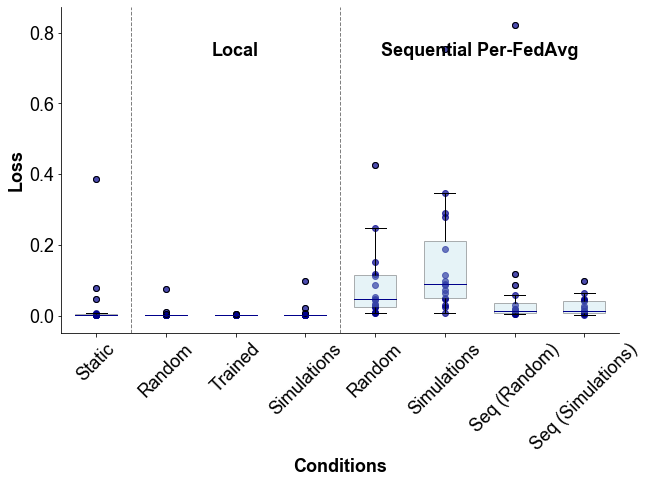

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the boxplots with transparent boxes using the reordered data
boxplot_elements = ax.boxplot(all_trials_cost_lst_reordered_FORBOXES, positions=positions, widths=0.6, patch_artist=True)

# Set the transparency for the boxes
for box in boxplot_elements['boxes']:
    box.set_facecolor('lightblue')  # Set box color
    box.set_alpha(0.3)  # Set transparency (0: fully transparent, 1: fully opaque)

# Set the color for the medians
for median in boxplot_elements['medians']:
    median.set_color('darkblue')

# Plot the scatter points using the reordered trial data
for i in range(len(all_trials_cost_lst_reordered)):
    for j in range(NUM_CLIENTS):
        if all_trials_cost_lst_reordered[i][j] == -1:
            continue
        else:
            ax.scatter([i], all_trials_cost_lst_reordered[i][j], alpha=0.7, color='darkblue')

# Set the x-tick labels in the new order
ax.set_xticks(positions)
ax.set_xticklabels(x_labels, rotation=45)

ax.axvline(x=0.5, color='gray', linestyle='--', linewidth=1)
ax.axvline(x=3.5, color='gray', linestyle='--', linewidth=1)

# Get axis limits and adjust text positioning accordingly
ax = plt.gca()  # Get current axis
ylim = ax.get_ylim()  # Get y-axis limits
# PUT TEXT AT TOP OF PLOT
y_position = ylim[1] - 0.15 * (ylim[1] - ylim[0])  # Adjust the position just below the x-axis
# Adding subgroup labels below the x-tick labels with better positioning
ax.text(2, y_position, subgroup_labels[0], ha='center', fontsize=18, weight='bold')
ax.text(5.5, y_position, subgroup_labels[1], ha='center', fontsize=18, weight='bold')

# Axis labels
ax.set_ylabel("Loss", fontweight='bold')
ax.set_xlabel("Conditions", fontweight='bold')

# Remove top and right plot borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)

#plt.savefig('CLE_Final_Loss_B1.png', dpi=500, bbox_inches='tight')
plt.show()


## Position Error Plots

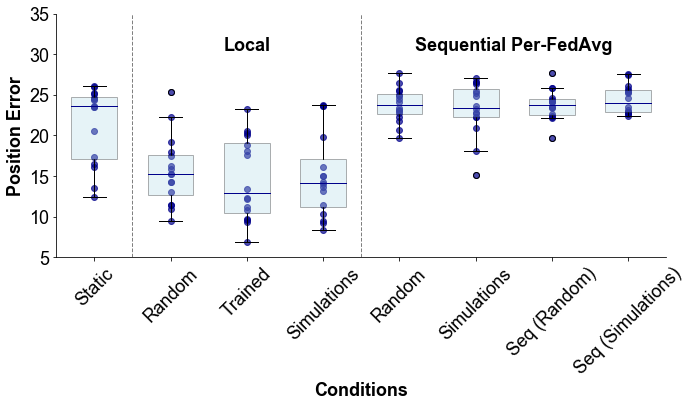

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the boxplots with transparent boxes
boxplot_elements = ax.boxplot(all_trials_tdpe_lst_reordered_FORBOXES, positions=positions, widths=0.6, patch_artist=True)

# Set the transparency for the boxes
for box in boxplot_elements['boxes']:
    box.set_facecolor('lightblue')  # Set box color
    box.set_alpha(0.3)  # Set transparency (0: fully transparent, 1: fully opaque)
    
# Set the color for the medians
for median in boxplot_elements['medians']:
    median.set_color('darkblue')

# Plot the scatter points using the reordered trial data
for i in range(len(all_trials_tdpe_lst_reordered)):
    for j in range(NUM_CLIENTS):
        if all_trials_tdpe_lst_reordered[i][j] == -1:
            continue
        else:
            ax.scatter([i], all_trials_tdpe_lst_reordered[i][j], alpha=0.7, color='darkblue')

# Set the x-tick labels
ax.set_xticks(positions)
ax.set_xticklabels(x_labels, fontsize=ticks_fontsize, rotation=45)

# Adding vertical lines for separation (adjust the positions based on the new x-axis order if needed)
ax.axvline(x=0.5, color='gray', linestyle='--', linewidth=1)
ax.axvline(x=3.5, color='gray', linestyle='--', linewidth=1)

ax.set_ylim(5.0, 35.0)

# Get axis limits and adjust text positioning accordingly
ax = plt.gca()  # Get current axis
ylim = ax.get_ylim()  # Get y-axis limits
# PUT TEXT AT TOP OF PLOT
y_position = ylim[1] - 0.15 * (ylim[1] - ylim[0])  # Adjust the position just below the x-axis
# Adding subgroup labels below the x-tick labels with better positioning
ax.text(2, y_position, subgroup_labels[0], ha='center', fontsize=18, weight='bold')
ax.text(5.5, y_position, subgroup_labels[1], ha='center', fontsize=18, weight='bold')

ax.set_ylabel("Position Error", fontsize=labels_fontsize, fontweight='bold')
ax.set_xlabel("Conditions", fontsize=labels_fontsize, fontweight='bold')

# Remove top and right plot borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)

plt.tight_layout()
#plt.savefig('CLE_Final_TDPE_B1.png', dpi=500)
plt.show()

## Running Model Performances Across Users

In [20]:
pfarr_final_perfs_by_client = [perf_dict[f'Block{BLOCK_NUM}_C6_pfa_running_random']['mean_cost'] for perf_dict in perf_dicts_lst]
pfars_final_perfs_by_client = [perf_dict[f'Block{BLOCK_NUM}_C7_pfa_running_sim']['mean_cost'] for perf_dict in perf_dicts_lst]

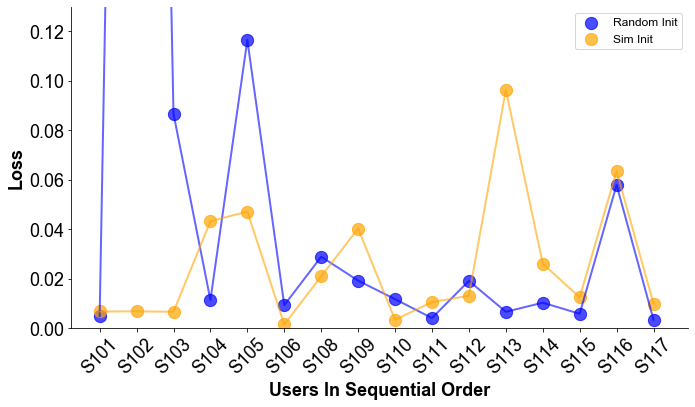

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
dot_size = 150

# Define x-tick labels and corresponding subgroup labels
x_labels = my_subjects_lst

# Prepare lists to store data for the lines
pfarr_values = []  # Stores values for 'Random Init'
pfars_values = []  # Stores values for 'Sim Init'

# Plotting the scatter points and storing the values for the lines
for i, subj in enumerate(x_labels):
    # Append the values to lists for line plotting
    pfarr_values.append(pfarr_final_perfs_by_client[i])
    pfars_values.append(pfars_final_perfs_by_client[i])

    # Scatter plot of points for each trial
    if i == 0:
        ax.scatter([i], pfarr_final_perfs_by_client[i], alpha=0.7, color='blue', label='Random Init', s=dot_size)
        ax.scatter([i], pfars_final_perfs_by_client[i], alpha=0.7, color='orange', label='Sim Init', s=dot_size)
    else:
        ax.scatter([i], pfarr_final_perfs_by_client[i], alpha=0.7, color='blue', s=dot_size)
        ax.scatter([i], pfars_final_perfs_by_client[i], alpha=0.7, color='orange', s=dot_size)

# Plotting the lines connecting the scatter points
ax.plot(range(len(x_labels)), pfarr_values, color='blue', alpha=0.6, linestyle='-', linewidth=2)
ax.plot(range(len(x_labels)), pfars_values, color='orange', alpha=0.6, linestyle='-', linewidth=2)

# Set the x-tick labels
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, fontsize=ticks_fontsize, rotation=45)

# Get axis limits and adjust text positioning accordingly
ax = plt.gca()  # Get current axis
# Axis labels
ax.set_ylabel("Loss", fontsize=labels_fontsize, fontweight='bold')
ax.set_xlabel("Users In Sequential Order", fontsize=labels_fontsize, fontweight='bold')
#ax.set_title(f"Block {BLOCK_NUM} Running Model Losses As A Function of Sequential User", fontsize=title_fontsize, fontweight='bold')
ax.set_ylim(0.0, 0.13)
ax.legend()

# Remove top and right plot borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)

plt.tight_layout()
#plt.savefig('SeqUser_Loss_B1.png', dpi=500)
plt.show()

> __TDPE__

In [22]:
pfarr_final_perfs_by_client = [perf_dict[f'Block{BLOCK_NUM}_C6_pfa_running_random']['mean_tdpe'] for perf_dict in perf_dicts_lst]
pfars_final_perfs_by_client = [perf_dict[f'Block{BLOCK_NUM}_C7_pfa_running_sim']['mean_tdpe'] for perf_dict in perf_dicts_lst]

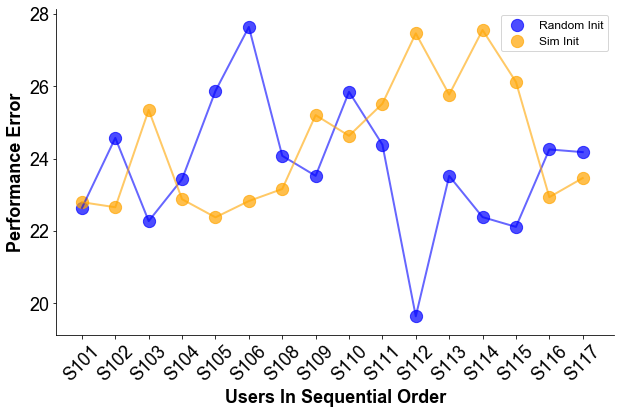

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
dot_size = 150

# Define x-tick labels
x_labels = my_subjects_lst

# Prepare lists to store performance error values for the lines
pfarr_values = []  # Stores values for 'Random Init'
pfars_values = []  # Stores values for 'Sim Init'

# Plotting the scatter points and storing values for lines
for i, subj in enumerate(x_labels):
    # Append the values to lists for line plotting
    pfarr_values.append(pfarr_final_perfs_by_client[i])  # Random Init
    pfars_values.append(pfars_final_perfs_by_client[i])  # Sim Init

    # Scatter plot of points for each trial (Random Init and Sim Init)
    if i == 0:
        ax.scatter([i], pfarr_final_perfs_by_client[i], alpha=0.7, color='blue', label='Random Init', s=dot_size)
        ax.scatter([i], pfars_final_perfs_by_client[i], alpha=0.7, color='orange', label='Sim Init', s=dot_size)
    else:
        ax.scatter([i], pfarr_final_perfs_by_client[i], alpha=0.7, color='blue', s=dot_size)
        ax.scatter([i], pfars_final_perfs_by_client[i], alpha=0.7, color='orange', s=dot_size)

# Plotting the lines connecting the scatter points
ax.plot(range(len(x_labels)), pfarr_values, color='blue', alpha=0.6, linestyle='-', linewidth=2)
ax.plot(range(len(x_labels)), pfars_values, color='orange', alpha=0.6, linestyle='-', linewidth=2)

# Set the x-tick labels
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45)

# Axis labels and title for Performance Error
ax.set_ylabel("Performance Error", fontweight='bold')
ax.set_xlabel("Users In Sequential Order", fontweight='bold')

ax.legend()

# Remove top and right plot borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)

#plt.savefig('SeqUser_TDPE_B1.png', dpi=500)
plt.show()


## Decoder Distances

In [24]:
block = BLOCK_NUM
which_model = 'final'
conditions_names_only_lst = [
    'local_random_init', 'local_prev_local_init', 'local_sims_init', 
    'StaticTrial', 'pfa_random_init', 'pfa_sims_init', 
    'pfa_running_random', 'pfa_running_sim'
]
num_conditions = len(conditions_names_only_lst)

RUNNING_MODEL_DIR = r'C:\Users\km82\Desktop\dev\labgraph-Rice\models\decoder_initializations'

In [25]:
all_init_cond_models_dict = {conditions_names_only_lst[i]: [] for i in range(num_conditions)}
all_final_cond_models_dict = {conditions_names_only_lst[i]: [] for i in range(num_conditions)}

# C 0 and 4
rand_init_dec = np.load(RUNNING_MODEL_DIR + '\\pos_init_dec.npy')
# C 2 and 5
sims_init_dec = np.load(f'{RUNNING_MODEL_DIR}\\sims_inits\\cpfa_sims_init.npy')

for subject_ID_str in my_subjects_lst:
    # These ones are the same for all clients
    all_init_cond_models_dict[conditions_names_only_lst[0]].append(rand_init_dec)
    all_init_cond_models_dict[conditions_names_only_lst[4]].append(rand_init_dec)
    all_init_cond_models_dict[conditions_names_only_lst[2]].append(sims_init_dec)
    all_init_cond_models_dict[conditions_names_only_lst[5]].append(sims_init_dec)
    
    # LOAD INIT MODELS
    subject_ID_num = int(subject_ID_str[1:])
    # C 1
    prev_local = np.load(f'{RUNNING_MODEL_DIR}\\all_extracted_models\\{str(subject_ID_num)}\\local_random_init_{which_model}_model_B{block}.npy')
    all_init_cond_models_dict[conditions_names_only_lst[1]].append(prev_local)
    all_init_cond_models_dict[conditions_names_only_lst[3]].append(prev_local)
    # C6
    if subject_ID_num>100:
        prr = np.load(f'{RUNNING_MODEL_DIR}\\all_extracted_models\\{str(subject_ID_num-1)}\\pfa_running_random_{which_model}_model_B{block}.npy')
    else:
        # S100 case, use S999
        prr = np.load(f'C:\\Users\\km82\\Desktop\\dev\\labgraph-Rice\\models\\decoder_initializations\\all_extracted_models\\Piloting\\999\\pfa_running_random_{which_model}_model_B{block}.npy')
    all_init_cond_models_dict[conditions_names_only_lst[6]].append(prr)
    
    # C7
    if subject_ID_num>100:
        prs = np.load(f'{RUNNING_MODEL_DIR}\\all_extracted_models\\{str(subject_ID_num-1)}\\pfa_running_sim_{which_model}_model_B{block}.npy')
    else:
        # S100 case, use S999
        prs = np.load(f'C:\\Users\\km82\\Desktop\\dev\\labgraph-Rice\\models\\decoder_initializations\\all_extracted_models\\Piloting\\999\\pfa_running_sim_{which_model}_model_B{block}.npy')
    all_init_cond_models_dict[conditions_names_only_lst[7]].append(prs)
        
    # LOAD FINAL MODELS
    for cond_name in conditions_names_only_lst:
        try:
            all_final_cond_models_dict[cond_name].append(np.load(f'{RUNNING_MODEL_DIR}\\all_extracted_models\\{str(subject_ID_num)}\\{cond_name}_{which_model}_model_B{block}.npy'))
        except FileNotFoundError:
            # Do I need to do anything... could just have it load in the sister block 1/2 model (assuming at least one exists)
            print("NOT FOUND!")
            print(f'{RUNNING_MODEL_DIR}\\all_extracted_models\\{str(subject_ID_num)}\\{cond_name}_{which_model}_model_B{block}.npy')
            print()

In [26]:
avg_init_model_per_cond = [np.mean(np.stack(all_init_cond_models_dict[key]), axis=0) for key in conditions_names_only_lst]
avg_final_model_per_cond = [np.mean(np.stack(all_final_cond_models_dict[key]), axis=0) for key in conditions_names_only_lst]
avg_final_dec = np.mean(avg_final_model_per_cond, axis=0)

In [27]:
init_model_norm_per_cond_dict = {conditions_names_only_lst[i]: [] for i in range(num_conditions)}
final_model_norm_per_cond_dict = {conditions_names_only_lst[i]: [] for i in range(num_conditions)}

rel_diff_init_model_avg_norm_per_cond_dict = {conditions_names_only_lst[i]: [] for i in range(num_conditions)}
rel_diff_final_model_avg_norm_per_cond_dict = {conditions_names_only_lst[i]: [] for i in range(num_conditions)}
rel_diff_init_model_norm_per_cond_dict = {conditions_names_only_lst[i]: [] for i in range(num_conditions)}
rel_diff_final_model_norm_per_cond_dict = {conditions_names_only_lst[i]: [] for i in range(num_conditions)}

# Calculate the norm of each decoder matrix for all subjects in each condition
for key_idx, key in enumerate(conditions_names_only_lst):
    # Compute norms of each decoder matrix in the initial and final models
    init_model_norm_per_cond_dict[key].append([np.linalg.norm(dec) for dec in all_init_cond_models_dict[key]])
    final_model_norm_per_cond_dict[key].append([np.linalg.norm(dec) for dec in all_final_cond_models_dict[key]])
    
    rel_diff_init_model_avg_norm_per_cond_dict[key].append([np.linalg.norm(dec - avg_final_dec) for dec in all_init_cond_models_dict[key]])
    rel_diff_final_model_avg_norm_per_cond_dict[key].append([np.linalg.norm(dec - avg_final_dec) for dec in all_final_cond_models_dict[key]])
    
    rel_diff_init_model_norm_per_cond_dict[key].append([np.linalg.norm(dec - avg_init_model_per_cond[key_idx]) for dec in all_init_cond_models_dict[key]])
    rel_diff_final_model_norm_per_cond_dict[key].append([np.linalg.norm(dec - avg_final_model_per_cond[key_idx]) for dec in all_final_cond_models_dict[key]])


In [28]:
# Define the keys
keys = [ 
    'local_random_init', 'local_prev_local_init', 'local_sims_init', 
    'StaticTrial', 'pfa_random_init', 'pfa_sims_init', 
    'pfa_running_random', 'pfa_running_sim'
]

# Optionally, you can set colors for the boxes
colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightcoral', 
          'lightgray', 'lightcyan', 'lightgoldenrodyellow']

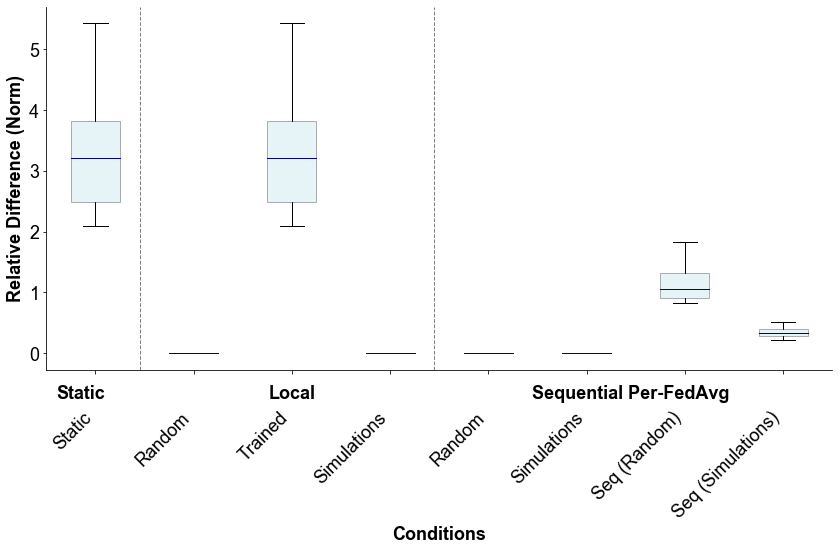

In [29]:
# Extract the lists of floats (norm differences) from the dictionary
data_for_boxplot = [rel_diff_init_model_norm_per_cond_dict[key][0] for key in keys]

# Reorder the lists
_, data_for_boxplot_reordered = reorder_list(condition_name_labels, data_for_boxplot)

fig, ax = plt.subplots(figsize=(12, 8))
bplot = ax.boxplot(data_for_boxplot_reordered, patch_artist=True, showfliers=False)

# Set the transparency for the boxes
for box in bplot['boxes']:
    box.set_facecolor('lightblue')  # Set box color
    box.set_alpha(0.3)  # Set transparency (0: fully transparent, 1: fully opaque)
    
# Set the color for the medians
for median in bplot['medians']:
    median.set_color('darkblue')

ax.set_xticklabels(reordered_conds, fontsize=ticks_fontsize, rotation=45, ha='right')
ax.tick_params(axis='x', pad=35)  # Increase the padding to move x-tick labels downward
ax.set_ylabel('Relative Difference (Norm)', fontsize=labels_fontsize, fontweight='bold')
ax.set_xlabel("Conditions", fontsize=labels_fontsize, fontweight='bold')

ax.axvline(x=1.45, color='gray', linestyle='--', linewidth=1)
ax.axvline(x=4.45, color='gray', linestyle='--', linewidth=1)

# Get axis limits and adjust text positioning accordingly
ax = plt.gca()  # Get current axis
ylim = ax.get_ylim()  # Get y-axis limits
# PUT TEXT BELOW X AXIS
y_position = ylim[0] - 0.08 * (ylim[1] - ylim[0])  # Move the text further below the x-axis
# Adding subgroup labels below the x-tick labels with better positioning
ax.text(0.85, y_position, 'Static', ha='center', fontsize=18, weight='bold')
ax.text(3, y_position, subgroup_labels[0], ha='center', fontsize=18, weight='bold')
ax.text(6.45, y_position, subgroup_labels[1], ha='center', fontsize=18, weight='bold')

# Remove top and right plot borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)

plt.tight_layout()
plt.show()


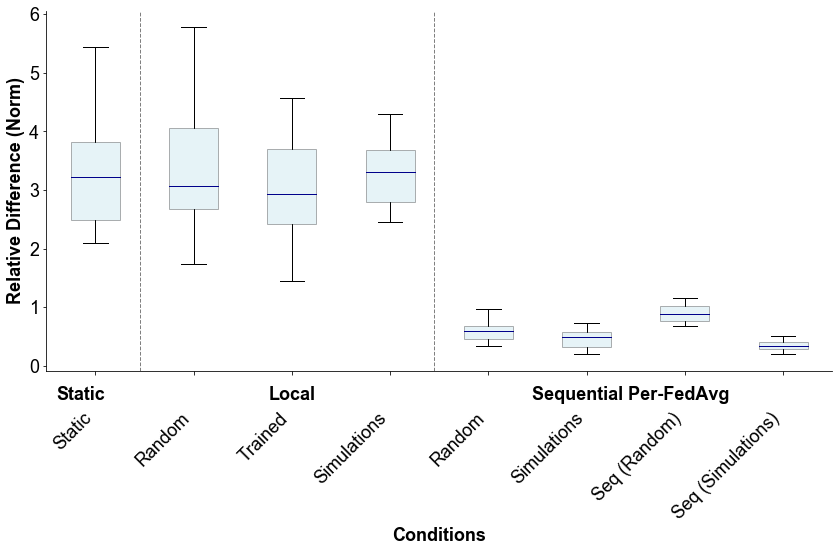

In [30]:
# Extract the lists of floats (norm differences) from the dictionary
data_for_boxplot = [rel_diff_final_model_norm_per_cond_dict[key][0] for key in keys]

# Reorder the lists
_, data_for_boxplot_reordered = reorder_list(condition_name_labels, data_for_boxplot)

fig, ax = plt.subplots(figsize=(12, 8))
bplot = ax.boxplot(data_for_boxplot, patch_artist=True, showfliers=False)

# Set the transparency for the boxes
for box in bplot['boxes']:
    box.set_facecolor('lightblue')  # Set box color
    box.set_alpha(0.3)  # Set transparency (0: fully transparent, 1: fully opaque)
    
# Set the color for the medians
for median in bplot['medians']:
    median.set_color('darkblue')

ax.set_xticklabels(reordered_conds, fontsize=ticks_fontsize, rotation=45, ha='right')
ax.tick_params(axis='x', pad=35)  # Increase the padding to move x-tick labels downward
ax.set_ylabel('Relative Difference (Norm)', fontsize=labels_fontsize, fontweight='bold')
ax.set_xlabel("Conditions", fontsize=labels_fontsize, fontweight='bold')

ax.axvline(x=1.45, color='gray', linestyle='--', linewidth=1)
ax.axvline(x=4.45, color='gray', linestyle='--', linewidth=1)

# Get axis limits and adjust text positioning accordingly
ax = plt.gca()  # Get current axis
ylim = ax.get_ylim()  # Get y-axis limits
# PUT TEXT BELOW X AXIS
y_position = ylim[0] - 0.08 * (ylim[1] - ylim[0])  # Move the text further below the x-axis
# Adding subgroup labels below the x-tick labels with better positioning
ax.text(0.85, y_position, 'Static', ha='center', fontsize=18, weight='bold')
ax.text(3, y_position, subgroup_labels[0], ha='center', fontsize=18, weight='bold')
ax.text(6.45, y_position, subgroup_labels[1], ha='center', fontsize=18, weight='bold')

# Remove top and right plot borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)

plt.tight_layout()
#plt.savefig('FinalDecDifferences_B1.png', dpi=500)
plt.show()


In [49]:
conds_lst = ['local_random_init', 'local_sims_init', 'StaticTrial', 'pfa_random_init', 'pfa_sims_init', 'pfa_running_random', 'pfa_running_sim']

In [50]:
# Flatten the `data_for_boxplot` lists only for selected conditions
relative_diff_norm = [
    val for sublist, cond in zip(data_for_boxplot, keys) 
    if cond in conds_lst
    for val in sublist
]

# Repeat subgroup labels according to the selected conditions
subgroup_repeated = [
    subgroup_labels[i // len(data_for_boxplot[0])]
    for i, (sublist, cond) in enumerate(zip(data_for_boxplot, keys))
    if cond in conds_lst
    for _ in sublist
]

# Repeat condition names for each value in each condition
condition_repeated = [cond for cond, vals in zip(keys, data_for_boxplot) if cond in conds_lst for _ in vals]


In [52]:
# Provided data
model_inits_lst = ['Random', 'Simulations', 'Trained', 'Random', 'Simulations', 'Sequential (R)', 'Sequential (S)']

# Create a mapping of conditions to the corresponding DATA values
# Assuming each condition corresponds to the data in the same order
condition_to_data = {
    'local_random_init': model_inits_lst[0],  # Random
    'local_sims_init': model_inits_lst[1],     # Simulations
    'StaticTrial': model_inits_lst[2],         # Trained
    'pfa_random_init': model_inits_lst[3],     # Random
    'pfa_sims_init': model_inits_lst[4],        # Simulations
    'pfa_running_random': model_inits_lst[5],        # Sequential Random
    'pfa_running_sim': model_inits_lst[6],        # Sequential Simulations
}

# Create a new list to match the length and order of `condition_repeated`
model_init_repeated = [
    condition_to_data[cond] 
    for cond in condition_repeated
]


In [53]:
# Create a DataFrame from the corrected data
df = pd.DataFrame({
    'Relative Difference (Norm)': relative_diff_norm,
    'Condition': condition_repeated,
    'Model Init': model_init_repeated,
    'Subgroup': subgroup_repeated
})

In [54]:
df

,Relative Difference (Norm),Condition,Model Init,Subgroup
0,5.432058,local_random_init,Random,Local
1,3.331261,local_random_init,Random,Local
2,3.130500,local_random_init,Random,Local
3,3.913726,local_random_init,Random,Local
4,4.545841,local_random_init,Random,Local
...,...,...,...,...
107,0.437237,pfa_running_sim,Sequential (S),Local
108,0.344076,pfa_running_sim,Sequential (S),Local
109,0.282478,pfa_running_sim,Sequential (S),Local
110,0.293995,pfa_running_sim,Sequential (S),Local


In [58]:
# Define the order of conditions, with "StaticTrial" at the end
condition_order = [cond for cond in df['Condition'].unique() if cond != 'StaticTrial'] + ['StaticTrial']
condition_order

['local_random_init',
 'local_sims_init',
 'pfa_random_init',
 'pfa_sims_init',
 'pfa_running_random',
 'pfa_running_sim',
 'StaticTrial']

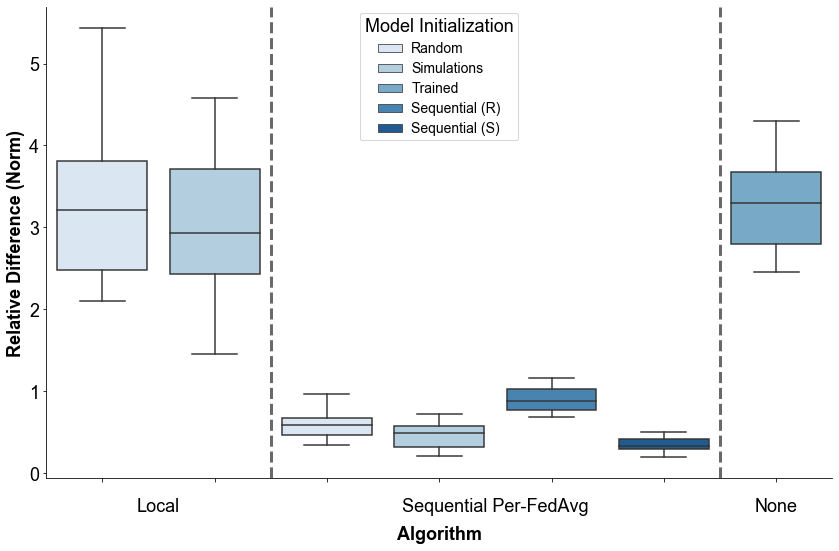

In [62]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=df, x='Condition', y='Relative Difference (Norm)', hue='Model Init', 
            ax=ax, showfliers=False, dodge=False, palette='Blues', order=condition_order)

# Customize appearance
ax.tick_params(axis='x', pad=40)
ax.set_ylabel('Relative Difference (Norm)', fontsize=labels_fontsize, fontweight='bold')
ax.set_xlabel("Algorithm", fontsize=labels_fontsize, fontweight='bold')
ax.set_xticklabels([])  # Remove x tick labels from the bottom plot

# Add vertical lines
ax.axvline(x=1.5, color='dimgray', linestyle='--', linewidth=3)
ax.axvline(x=5.5, color='dimgray', linestyle='--', linewidth=3)

# Position subgroup labels
ylim = ax.get_ylim()
y_position = ylim[0] - 0.07 * (ylim[1] - ylim[0])
ax.text(6., y_position, 'None', ha='center', fontsize=18)  #, weight='bold'
ax.text(0.5, y_position, subgroup_labels[0], ha='center', fontsize=18)
ax.text(3.5, y_position, subgroup_labels[1], ha='center', fontsize=18)

# Remove top and right plot borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize legend font size
legend = ax.legend()
legend.set_title("Model Initialization")
for text in legend.get_texts():
    text.set_fontsize(14)  # Set legend font size

plt.tight_layout()
#plt.savefig('FinalDecDifferences_B1_with_hue.png', dpi=500)
plt.show()


In [63]:
df.head()

,Relative Difference (Norm),Condition,Model Init,Subgroup
0,5.432058,local_random_init,Random,Local
1,3.331261,local_random_init,Random,Local
2,3.130500,local_random_init,Random,Local
3,3.913726,local_random_init,Random,Local
4,4.545841,local_random_init,Random,Local
